In [1]:
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 통계적 모형
import statsmodels.api as sm

# 머신러닝
from sklearn import datasets
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_log_error, mean_squared_error, r2_score, mean_absolute_error

# 과적합(Overfit)
- 모형이 훈련자료에 매우 잘 길들여졌다고 표현
    - 오히려 예측 성능은 매우 낮아지게 된다. 
- 훈련 자료의 수가 너무 적은경우 
    - 자료의 수를 늘린다. 
- 모형의 복잡도가 너무 큰 경우(변수가 많은 경우)
    - 변수의 갯수를 줄이는 방법(변수 선택법)
    - 다중공선성(변수들이 서로 독립적이지 않은 경우) 제거 - 상관계수, VIF
    - 일반화 또는 정규화 - 회귀계수를 축소(ridge, rasso)
    
- 과적합을 해결할 수 있는 방법은 없습니다. (적어도 아직까지는)
- 과적합을 줄이는 방법

## 보스턴 집값 데이터

In [2]:
boston = datasets.load_boston()

In [10]:
x = boston.data
y = boston.target

# pd.DataFrame(y, columns=['label'])
# pd.DataFrame(x, columns=boston.feature_names)

## 선형회귀모형

### 훈련자료와 검증자료 분리 

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=123, train_size=0.8)

### scikit learn을 이용한 선형회귀모형 적합

In [40]:
linear_model = LinearRegression(fit_intercept=True).fit(x_train, y_train)

In [19]:
linear_model.coef_

array([-9.87931696e-02,  4.75027102e-02,  6.69491841e-02,  1.26954150e+00,
       -1.54697747e+01,  4.31968412e+00, -9.80167937e-04, -1.36597953e+00,
        2.84521838e-01, -1.27533606e-02, -9.13487599e-01,  7.22553507e-03,
       -5.43790245e-01])

### 학습 정확도와 오차

In [23]:
y_hat_train = linear_model.predict(x_train)

In [30]:
# R-Squred
score1 = linear_model.score(x_train, y_train)
score2 = r2_score(y_train, y_hat_train)
print(score1)
print(score2)

0.7559380876016175
0.7559380876016175


In [31]:
mean_absolute_error(y_true = y_train, y_pred = y_hat_train)

3.1749500258692454

In [33]:
mean_squared_error(y_true= y_train, y_pred = y_hat_train)

20.677107947815138

### 테스트 정확도와 오차

In [34]:
# 학습할 때, 사용하지 않은 자료를 통해 예측 정확도를 확인
y_hat = linear_model.predict(x_test)

In [36]:
# R-Squred
score1 = linear_model.score(x_test, y_test)
score2 = r2_score(y_test, y_hat)
print(score1)
print(score2)

0.6592466510354125
0.6592466510354125


In [37]:
mean_absolute_error(y_true = y_test, y_pred = y_hat)

3.660152818697662

In [38]:
mean_squared_error(y_true= y_test, y_pred = y_hat)

28.192485758469314

## Ridge 
- L2 norm
$$
    ||\beta||_2 = \sum_{i=1}^n \beta_i^2
$$

$$
    mse = \frac{1}{n}\sum_{i=1}^n (Y_i - (\beta_0 + \beta_1 x_1 + ... + \beta_n x_n))^2 + \lambda \sum_{i=0}^n \beta_i^2 \\
    mse = \frac{1}{n}\sum_{i=1}^n (Y_i - \beta_0 - \beta_1 x_1 - ... - \beta_n x_n))^2 + \lambda \beta_0^2 + \lambda \beta_1^2 + ... \lambda \beta_n^2 \\
    \lambda = 0 이라면, ...\\ 
    mse = \frac{1}{n}\sum_{i=1}^n (Y_i - \beta_0 - \beta_1 x_1 - ... - \beta_n x_n))^2 + 0 \beta_0^2 + 0 \beta_1^2 + ... 0 \beta_n^2 \\ 
    \lambda = 1000 이라면, ... \\ 
    mse = \frac{1}{n}\sum_{i=1}^n (Y_i - \beta_0 - \beta_1 x_1 - ... - \beta_n x_n))^2 + 1000 \beta_0^2 + 1000 \beta_1^2 + ... 1000 \beta_n^2 \\
$$

In [137]:
ridge_model = Ridge(alpha = 1, fit_intercept=True, random_state=123).fit(x_train, y_train)

### 학습정확도와 오차

In [43]:
yhat_train = ridge_model.predict(x_train)

In [45]:
print( ridge_model.score(x_train, y_train) )
print( r2_score(y_train, yhat_train) )

0.7552193970322694
0.7552193970322694


In [47]:
print( mean_absolute_error(y_true=y_train, y_pred=yhat_train))
print( mean_squared_error(y_true = y_train, y_pred=yhat_train))

3.164285675286721
20.737995950934735


### 테스트 정확도와 오차

In [49]:
yhat = ridge_model.predict(x_test)
print( r2_score(y_test, yhat) )
print( mean_absolute_error(y_true=y_test, y_pred=yhat))
print( mean_squared_error(y_true=y_test, y_pred=yhat))

0.6538761726587081
3.6765396942963773
28.636816344247762


### 최적의 람다값은?

In [ ]:
# 무식하게 찾아보기
alphas = np.linspace(0, 1, 1000)
for alpha in alphas:
    model = Ridge(alpha=alpha, random_state=123).fit(x_train, y_train)
    print('score: {}'.format(model.score(x_test, y_test)))

In [56]:
import sklearn
sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_wei

In [80]:
alphas = np.linspace(0, 1, 1000)
parameter = {
    'alpha': alphas
}

ridge = Ridge()
model = GridSearchCV(ridge, parameter, scoring='r2', cv=5)
model.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': array([0.        , 0.001001  , 0.002002  , 0.003003  , 0.004004  ,
       0.00500501, 0.00600601, 0.00700701, 0.00800801, 0.00900901,
       0.01001001, 0.01101101, 0.01201201, 0.01301301, 0.01401401,
       0.01501502, 0.01601602, 0.01701702, 0.01801802, 0.01901902,
       0.02002002, 0.02102102, 0.02202202, 0.02302302, 0.02402402,
       0.02502503, 0.02602603, 0.0270...
       0.96596597, 0.96696697, 0.96796797, 0.96896897, 0.96996997,
       0.97097097, 0.97197197, 0.97297297, 0.97397397, 0.97497497,
       0.97597598, 0.97697698, 0.97797798, 0.97897898, 0.97997998,
       0.98098098, 0.98198198, 0.98298298, 0.98398398, 0.98498498,
       0.98598599, 0.98698699, 0.98798799, 0.98898899, 0.98998999,
       0.99099099, 0.99199199, 0.99299299, 0.99399399, 0.99499499,
       0.995996  , 0.996997  , 0.997998  , 0.998999  , 1.        ])},
             scoring='r2')

In [ ]:
model.cv_results_['split1_test_score']

In [87]:
model.cv_results_['mean_test_score']

array([0.73116476, 0.73116764, 0.7311705 , 0.73117333, 0.73117613,
       0.7311789 , 0.73118166, 0.73118438, 0.73118708, 0.73118975,
       0.7311924 , 0.73119503, 0.73119762, 0.7312002 , 0.73120275,
       0.73120527, 0.73120777, 0.73121025, 0.7312127 , 0.73121513,
       0.73121753, 0.73121991, 0.73122227, 0.7312246 , 0.73122691,
       0.7312292 , 0.73123147, 0.73123371, 0.73123592, 0.73123812,
       0.73124029, 0.73124244, 0.73124457, 0.73124668, 0.73124876,
       0.73125082, 0.73125286, 0.73125488, 0.73125687, 0.73125885,
       0.7312608 , 0.73126273, 0.73126464, 0.73126653, 0.7312684 ,
       0.73127025, 0.73127208, 0.73127388, 0.73127567, 0.73127744,
       0.73127918, 0.73128091, 0.73128261, 0.7312843 , 0.73128596,
       0.73128761, 0.73128924, 0.73129084, 0.73129243, 0.731294  ,
       0.73129555, 0.73129708, 0.73129859, 0.73130008, 0.73130155,
       0.731303  , 0.73130444, 0.73130586, 0.73130726, 0.73130864,
       0.73131   , 0.73131134, 0.73131267, 0.73131398, 0.73131

In [88]:
model.best_params_

{'alpha': 0.16516516516516516}

In [89]:
model.best_score_

0.7313690830676025

In [90]:
model.best_estimator_

Ridge(alpha=0.16516516516516516)

In [91]:
ridge_model = model.best_estimator_

In [92]:
yhat = ridge_model.predict(x_test)
print( r2_score(y_test, yhat))
print( mean_absolute_error(y_true = y_test, y_pred = yhat))
print( mean_squared_error(y_true = y_test, y_pred = yhat))

0.6572237080173631
3.6667070874620937
28.35985547735791


## Lasso
- L1 norm
$$
    ||\beta||_1 = \sum_{i=1}^n |\beta_i|
$$

- 회귀계수가 0이 되는 성질이 있다. 
- 변수를 스스로 선택하는 모형이라고 잘 알려져 있다. 

In [138]:
lasso_model = Lasso(alpha=1, random_state=123).fit(x_train, y_train)

### 학습정확도와 오차

In [94]:
yhat_train = lasso_model.predict(x_train)

In [96]:
print( lasso_model.score(x_train, y_train) )
print( r2_score(y_train, yhat_train) )

0.7366987303695887
0.7366987303695887


In [97]:
print( mean_absolute_error(y_true=y_train, y_pred=yhat_train))
print( mean_squared_error(y_true = y_train, y_pred=yhat_train))

3.2723888330009223
22.307080697040693


### 테스트 정확도와 오차

In [98]:
yhat = lasso_model.predict(x_test)
print( r2_score(y_test, yhat) )
print( mean_absolute_error(y_true=y_test, y_pred=yhat))
print( mean_squared_error(y_true=y_test, y_pred=yhat))

0.6346070321957017
3.838026914981332
30.23106323787906


### 최적의 람다값은?

In [56]:
import sklearn
sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_wei

In [99]:
alphas = np.linspace(0, 1, 1000)
parameter = {
    'alpha': alphas
}

lasso = Lasso()
model = GridSearchCV(lasso, parameter, scoring='r2', cv=10)
model.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=Lasso(),
             param_grid={'alpha': array([0.        , 0.001001  , 0.002002  , 0.003003  , 0.004004  ,
       0.00500501, 0.00600601, 0.00700701, 0.00800801, 0.00900901,
       0.01001001, 0.01101101, 0.01201201, 0.01301301, 0.01401401,
       0.01501502, 0.01601602, 0.01701702, 0.01801802, 0.01901902,
       0.02002002, 0.02102102, 0.02202202, 0.02302302, 0.02402402,
       0.02502503, 0.02602603, 0.027...
       0.96596597, 0.96696697, 0.96796797, 0.96896897, 0.96996997,
       0.97097097, 0.97197197, 0.97297297, 0.97397397, 0.97497497,
       0.97597598, 0.97697698, 0.97797798, 0.97897898, 0.97997998,
       0.98098098, 0.98198198, 0.98298298, 0.98398398, 0.98498498,
       0.98598599, 0.98698699, 0.98798799, 0.98898899, 0.98998999,
       0.99099099, 0.99199199, 0.99299299, 0.99399399, 0.99499499,
       0.995996  , 0.996997  , 0.997998  , 0.998999  , 1.        ])},
             scoring='r2')

In [ ]:
model.cv_results_['split3_test_score']

In [104]:
model.cv_results_['mean_test_score']

array([0.71372139, 0.7137365 , 0.71374053, 0.71373327, 0.71371479,
       0.71368503, 0.71364406, 0.71359016, 0.71352654, 0.7134509 ,
       0.71337611, 0.71329317, 0.71318706, 0.71306972, 0.71293877,
       0.71280389, 0.71267835, 0.71254186, 0.71239448, 0.7122362 ,
       0.71206694, 0.71188677, 0.71169569, 0.71149373, 0.71128081,
       0.71105706, 0.71082235, 0.71057667, 0.71032007, 0.71005264,
       0.7097742 , 0.70948487, 0.70918463, 0.70887512, 0.70857508,
       0.70826985, 0.70795378, 0.70762692, 0.70728242, 0.70692583,
       0.70660903, 0.70646845, 0.706364  , 0.70632092, 0.7063411 ,
       0.70633752, 0.70635097, 0.70638783, 0.70641575, 0.70644423,
       0.70648821, 0.70653649, 0.7065903 , 0.70663523, 0.70666659,
       0.70669763, 0.70672835, 0.70675874, 0.70678888, 0.70681854,
       0.70684799, 0.70687621, 0.70690195, 0.7069276 , 0.7069529 ,
       0.70697797, 0.7070023 , 0.70702447, 0.70704631, 0.70706795,
       0.7070894 , 0.70711065, 0.70713171, 0.70714971, 0.70716

In [105]:
model.best_params_

{'alpha': 0.002002002002002002}

In [106]:
model.best_score_

0.7137405282486379

In [107]:
model.best_estimator_

Lasso(alpha=0.002002002002002002)

In [108]:
lasso_model = model.best_estimator_

In [109]:
yhat = lasso_model.predict(x_test)
print( r2_score(y_test, yhat))
print( mean_absolute_error(y_true = y_test, y_pred = yhat))
print( mean_squared_error(y_true = y_test, y_pred = yhat))

0.6582412937976467
3.66331568504376
28.275664749061804


## Elastic Net
- L2 norm과 L1 norm을 모두 사용하는 방법

In [139]:
elastic_model = ElasticNet(alpha=1, l1_ratio=0.5, random_state=123).fit(x_train, y_train)

### 학습정확도와 오차

In [115]:
yhat_train = elastic_model.predict(x_train)

In [116]:
print( lasso_model.score(x_train, y_train) )
print( r2_score(y_train, yhat_train) )

0.755920405467849
0.7014052859596391


In [117]:
print( mean_absolute_error(y_true=y_train, y_pred=yhat_train))
print( mean_squared_error(y_true = y_train, y_pred=yhat_train))

3.4881102472352725
25.297167731692536


### 테스트 정확도와 오차

In [118]:
yhat = elastic_model.predict(x_test)
print( r2_score(y_test, yhat) )
print( mean_absolute_error(y_true=y_test, y_pred=yhat))
print( mean_squared_error(y_true=y_test, y_pred=yhat))

0.6344613919118967
3.9660450742837647
30.243112896787796


### 최적의 람다값은?

In [56]:
import sklearn
sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_wei

In [119]:
alphas = np.linspace(0, 1, 1000)
parameter = {
    'alpha': alphas
}

elastic = ElasticNet(l1_ratio=0.5)
model = GridSearchCV(elastic, parameter, scoring='r2', cv=10)
model.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=ElasticNet(),
             param_grid={'alpha': array([0.        , 0.001001  , 0.002002  , 0.003003  , 0.004004  ,
       0.00500501, 0.00600601, 0.00700701, 0.00800801, 0.00900901,
       0.01001001, 0.01101101, 0.01201201, 0.01301301, 0.01401401,
       0.01501502, 0.01601602, 0.01701702, 0.01801802, 0.01901902,
       0.02002002, 0.02102102, 0.02202202, 0.02302302, 0.02402402,
       0.02502503, 0.02602603,...
       0.96596597, 0.96696697, 0.96796797, 0.96896897, 0.96996997,
       0.97097097, 0.97197197, 0.97297297, 0.97397397, 0.97497497,
       0.97597598, 0.97697698, 0.97797798, 0.97897898, 0.97997998,
       0.98098098, 0.98198198, 0.98298298, 0.98398398, 0.98498498,
       0.98598599, 0.98698699, 0.98798799, 0.98898899, 0.98998999,
       0.99099099, 0.99199199, 0.99299299, 0.99399399, 0.99499499,
       0.995996  , 0.996997  , 0.997998  , 0.998999  , 1.        ])},
             scoring='r2')

In [ ]:
model.cv_results_['split3_test_score']

In [120]:
model.cv_results_['mean_test_score']

array([0.71372139, 0.71385925, 0.71365911, 0.71332332, 0.71294282,
       0.71255842, 0.71218854, 0.71184088, 0.71151796, 0.71121977,
       0.71094512, 0.71069228, 0.71045929, 0.71024439, 0.71004577,
       0.70987354, 0.70971406, 0.70956595, 0.70943572, 0.7093198 ,
       0.70920361, 0.70909203, 0.7089872 , 0.70888857, 0.70879553,
       0.70870763, 0.70862432, 0.70854525, 0.70846993, 0.70839819,
       0.70832964, 0.70826404, 0.70820116, 0.70814084, 0.70808394,
       0.7080291 , 0.7079761 , 0.70792487, 0.70787506, 0.70782673,
       0.70777979, 0.70773392, 0.70768937, 0.7076457 , 0.70760319,
       0.70756085, 0.70752002, 0.7074799 , 0.7074405 , 0.70740166,
       0.70736326, 0.70732556, 0.70728826, 0.70725137, 0.70721486,
       0.70717868, 0.70714286, 0.70710728, 0.70707199, 0.70703681,
       0.70700189, 0.70696711, 0.70693249, 0.70689812, 0.70686368,
       0.70682938, 0.70679661, 0.70676576, 0.7067349 , 0.70670409,
       0.70667312, 0.70664224, 0.70661128, 0.70657989, 0.70654

In [121]:
model.best_params_

{'alpha': 0.001001001001001001}

In [122]:
model.best_score_

0.7138592482117893

In [123]:
model.best_estimator_

ElasticNet(alpha=0.001001001001001001)

In [124]:
elastic_model = model.best_estimator_

In [125]:
yhat = lasso_model.predict(x_test)
print( r2_score(y_test, yhat))
print( mean_absolute_error(y_true = y_test, y_pred = yhat))
print( mean_squared_error(y_true = y_test, y_pred = yhat))

0.6582412937976467
3.66331568504376
28.275664749061804


In [140]:
feature_name = pd.DataFrame(boston.feature_names, columns=['features'])
linear = pd.DataFrame(linear_model.coef_, columns=['linear_coef'])
ridge = pd.DataFrame(ridge_model.coef_, columns=['ridge_coef'])
lasso = pd.DataFrame(lasso_model.coef_, columns=['lasso_coef'])
elastic = pd.DataFrame(elastic_model.coef_, columns=['elastic_coef'])

coef_matrix = pd.concat([feature_name, linear], axis=1)
coef_matrix = pd.concat([coef_matrix, ridge], axis=1)
coef_matrix = pd.concat([coef_matrix, lasso], axis=1)
coef_matrix = pd.concat([coef_matrix, elastic], axis=1)
coef_matrix

,features,linear_coef,ridge_coef,lasso_coef,elastic_coef
0,CRIM,-0.098793,-0.096135,-0.051847,-0.067029
1,ZN,0.047503,0.047887,0.045805,0.052306
2,INDUS,0.066949,0.038925,-0.000000,-0.000000
3,CHAS,1.269541,1.088392,0.000000,0.000000
4,NOX,-15.469775,-8.541089,-0.000000,-0.000000
5,RM,4.319684,4.383475,1.580569,1.164089
6,AGE,-0.000980,-0.007522,0.017939,0.019384
7,DIS,-1.365980,-1.265657,-0.659311,-0.751663
8,RAD,0.284522,0.267244,0.220245,0.269876
9,TAX,-0.012753,-0.013287,-0.014092,-0.016062


# 다항회귀를 통한 정규화 과정 이해하기

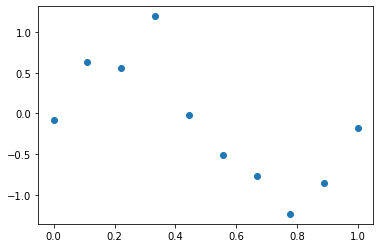

In [2]:
np.random.seed(2)

# 나중에 선 그리는 용도로 사용
x = np.linspace(0, 1, 1000)
y = np.sin(2 * np.pi * x)

xx = np.linspace(0, 1, 10)
yy = np.sin(2 * np.pi * xx) + (np.random.randn(10)/5)

plt.plot(xx, yy, 'o')
plt.show()

## 과적합 과정 이해하기

In [17]:
x_train = pd.DataFrame(xx, columns=['x'])

In [35]:
x_train.head(3)

,x
0,0.000000
1,0.111111
2,0.222222


In [33]:
# near_model = LinearRegression(fit_intercept=True).fit(x_train, y)
# linear_model = sm.OLS(y, x_train).fit()
linear_model = sm.OLS.from_formula(
    "yy ~ x + I(x**2) + I(x**3) + I(x**4) + I(x**5) + I(x**6) + I(x**7) + I(x**8) + I(x**9)", data=x_train
).fit()
linear_model.params

Intercept        -0.083352
x               200.636696
I(x ** 2)     -4236.423779
I(x ** 3)     35510.061351
I(x ** 4)   -154757.658901
I(x ** 5)    390214.111710
I(x ** 6)   -591735.157658
I(x ** 7)    532911.775303
I(x ** 8)   -262745.408537
I(x ** 9)     54637.965365
dtype: float64

In [29]:
df = pd.DataFrame(x, columns=['x'])
df = sm.add_constant(df)

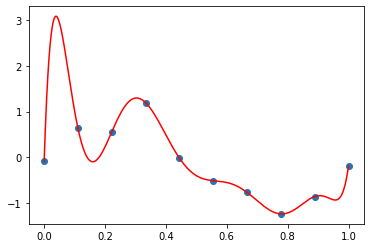

In [34]:
plt.plot(xx, yy, 'o')
plt.plot(x, linear_model.predict(df).values, 'r-')
plt.show()